Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import math
import statistics
import warnings
warnings.filterwarnings("ignore")


Reading the Data

In [2]:
application_data = 'C:/Users/ASHUTOSH/Downloads/Loan/application_data.csv'
application_df = pd.read_csv(application_data)
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Informaion

In [3]:
application_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [4]:
#Describing the dataframes
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
#Finding null values column-wise
application_df.isnull().sum().sort_values()

SK_ID_CURR                          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
                                ...  
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_MODE       213514
COMMONAREA_MODE                214865
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
Length: 122, dtype: int64

In [6]:
#Column wise null percentage
application_df.iloc[:, 0:60].isnull().sum().sort_values(ascending=False)/len(application_df)*100

COMMONAREA_AVG                 69.872297
NONLIVINGAPARTMENTS_AVG        69.432963
LIVINGAPARTMENTS_AVG           68.354953
FLOORSMIN_AVG                  67.848630
YEARS_BUILD_AVG                66.497784
OWN_CAR_AGE                    65.990810
LANDAREA_AVG                   59.376738
BASEMENTAREA_AVG               58.515956
BASEMENTAREA_MODE              58.515956
EXT_SOURCE_1                   56.381073
NONLIVINGAREA_AVG              55.179164
ELEVATORS_AVG                  53.295980
APARTMENTS_MODE                50.749729
APARTMENTS_AVG                 50.749729
ENTRANCES_AVG                  50.348768
LIVINGAREA_AVG                 50.193326
FLOORSMAX_AVG                  49.760822
YEARS_BEGINEXPLUATATION_AVG    48.781019
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS 

In [7]:
application_df.iloc[:, 60:120].isnull().sum().sort_values(ascending=False)/len(application_df)*100

COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
LANDAREA_MODE                   59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
NONLIVINGAREA_MODE              55.179164
NONLIVINGAREA_MEDI              55.179164
ELEVATORS_MODE                  53.295980
ELEVATORS_MEDI                  53.295980
WALLSMATERIAL_MODE              50.840783
APARTMENTS_MEDI                 50.749729
ENTRANCES_MEDI                  50.348768
ENTRANCES_MODE                  50.348768
LIVINGAREA_MEDI                 50.193326
LIVINGAREA_MODE                 50

In [8]:
application_df.iloc[:, 120:122].isnull().sum().sort_values(ascending=False)/len(application_df)*100

AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [9]:
#Row-wiese null values
application_df.isnull().sum(axis=1) / len(application_df)

0         0.000003
1         0.000007
2         0.000156
3         0.000182
4         0.000163
            ...   
307506    0.000026
307507    0.000033
307508    0.000013
307509    0.000098
307510    0.000055
Length: 307511, dtype: float64

In [10]:
# Calculate the null percentage for each column
null_percentage = application_df.isnull().sum() / len(application_df)

# Get the list of columns with null percentage greater than 40%
columns_to_drop = null_percentage[null_percentage > 0.4].index.tolist()

# Drop the columns from the dataframe
application_df = application_df.drop(columns_to_drop, axis=1)


In [11]:
application_df.shape

(307511, 73)

In [12]:
#Column wise null percentage
application_df.isnull().sum().sort_values(ascending=False)/len(application_df)*100

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

In [13]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

# Imputing columns with means 
AMT_REQ_CREDIT_BUREAU_YEAR     
AMT_REQ_CREDIT_BUREAU_QRT      
AMT_REQ_CREDIT_BUREAU_MON      
AMT_REQ_CREDIT_BUREAU_WEEK     
AMT_REQ_CREDIT_BUREAU_DAY      
AMT_REQ_CREDIT_BUREAU_HOUR  

In [14]:
column = application_df['EXT_SOURCE_3']
mean_value = column.mean()
column.fillna(mean_value, inplace=True)

In [15]:
#removing columns which i don't think will be necessary for this analysis
unnecessary = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
               'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
               'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
               'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
               'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','DAYS_LAST_PHONE_CHANGE']


In [16]:
len(unnecessary)

27

In [17]:
application_df.drop(unnecessary,inplace=True,axis=1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [18]:
application_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [19]:
# List of columns to convert to numeric
columns_to_convert = ['TARGET', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
                   'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                   'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                   'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

# Convert columns to numeric
for column in columns_to_convert:
    application_df[column] = pd.to_numeric(application_df[column])

# Check the data types of the columns
print(application_df.dtypes)


SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_STAR

In [20]:
#converting -ve to +ve
application_df['DAYS_BIRTH'] = application_df['DAYS_BIRTH'].abs()
application_df['DAYS_EMPLOYED'] = application_df['DAYS_EMPLOYED'].abs()
application_df['DAYS_REGISTRATION'] = application_df['DAYS_REGISTRATION'].abs()
application_df['DAYS_ID_PUBLISH'] = application_df['DAYS_ID_PUBLISH'].abs()
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Converting number of days of birth and employed into years 
#by considering average days of a year as 365 
application_df.DAYS_BIRTH=application_df.DAYS_BIRTH.values/365
application_df.DAYS_EMPLOYED=application_df.DAYS_EMPLOYED.values/365
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
incomebins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
incomeslots = ['0-25000','25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000',
               '175000-200000','200000-225000','225000-250000','250000-275000','275000-300000','300000-325000',
               '325000-350000','350000-375000','375000-400000','400000-425000','425000-450000','450000-475000',
               '475000-500000','500000 and above']
application_df['Amount_Income_range']=pd.cut(application_df['AMT_INCOME_TOTAL'],bins=incomebins,labels=incomeslots)
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amount_Income_range,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,500000-550000


In [23]:
application_df.Amount_Income_range.value_counts()

125000-150000       47890
100000-125000       43701
200000-225000       40797
75000,100000        39806
150000-175000       34663
175000-200000       29644
50000-75000         19375
250000-275000       12733
225000-250000        7340
300000-325000        6752
350000-375000        4537
25000-50000          4517
275000-300000        4306
425000-450000        3113
500000 and above     2702
325000-350000        2122
400000-425000        1811
375000-400000        1265
475000-500000         312
450000-475000         125
0-25000                 0
Name: Amount_Income_range, dtype: int64

In [24]:
creditbins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
creditslots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000','450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000','800000-850000','850000-900000','900000 and above']

application_df['CREDIT_RANGE'] = pd.cut(application_df.AMT_CREDIT,bins=creditbins,labels=creditslots)
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amount_Income_range,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,500000-550000


In [25]:
application_df.CREDIT_RANGE.value_counts()

900000 and above    58912
250000-300000       31759
200000-250000       23054
500000-550000       22678
400000-450000       18239
0-150000            18159
150000-200000       17985
300000-350000       16205
650000-700000       15051
450000-500000       13799
750000-800000       12380
800000-850000       11559
550000-600000       11554
850000-900000       10233
350000-400000       10133
600000-650000        8998
700000-750000        6813
Name: CREDIT_RANGE, dtype: int64

In [26]:
#Checking value counts for TARGET variable
application_df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [172]:
application_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amount_Income_range,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,"75000,100000",450000-500000
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,150000-175000,900000 and above
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350000-375000,900000 and above
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-125000,900000 and above
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,125000-150000,400000-450000


# Outliers

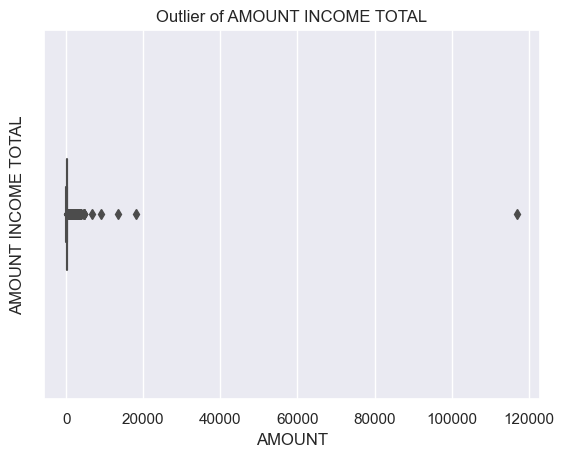

In [27]:
# Create a boxplot for AMT_INCOME_TOTAL column
sns.set()
sns.boxplot(x=application_df['AMT_INCOME_TOTAL']/1000, width=0.3)

# Set title and labels
plt.title('Outlier of AMOUNT INCOME TOTAL')
plt.ylabel('AMOUNT INCOME TOTAL')
plt.xlabel('AMOUNT')

# Display the plot
plt.show()


In [186]:
# Assuming the AMT_INCOME_TOTAL column is in the DataFrame called 'application_df'
income_data = application_df['AMT_GOODS_PRICE']

# Calculate Q1, Q3 and IQR
Q1 = np.percentile(income_data, 25)
Q2 = np.median(income_data)
Q3 = np.percentile(income_data, 75)
IQR = Q3 - Q1
max_out = Q3 + 1.5*IQR
print('Q1:', Q1)
print('Q2:', Q2)
print('Q3:', Q3)
print(IQR)
print(max_out)


Q1: nan
Q2: nan
Q3: nan
nan
nan


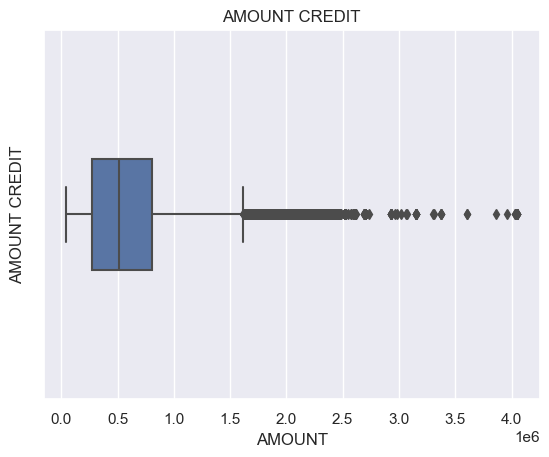

In [28]:
# Create a boxplot for AMT_CREDIT column
sns.set()
sns.boxplot(x=application_df['AMT_CREDIT'], width=0.3)

# Set title and labels
plt.title('AMOUNT CREDIT')
plt.ylabel('AMOUNT CREDIT')
plt.xlabel('AMOUNT')

# Display the plot
plt.show()


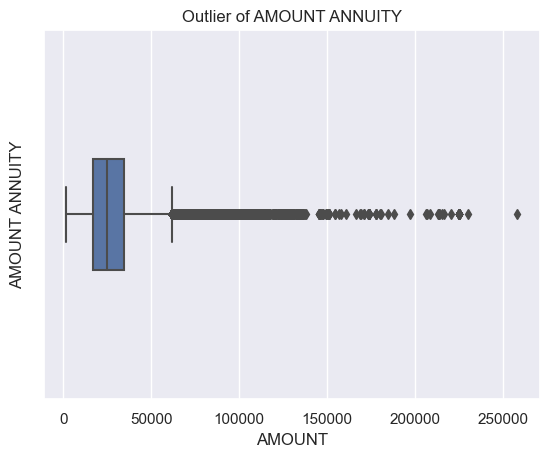

In [29]:
# Create a boxplot for AMT_INCOME_TOTAL column
sns.set()
sns.boxplot(x=application_df['AMT_ANNUITY'], width=0.3)

# Set title and labels
plt.title('Outlier of AMOUNT ANNUITY')
plt.ylabel('AMOUNT ANNUITY')
plt.xlabel('AMOUNT')

# Display the plot
plt.show()


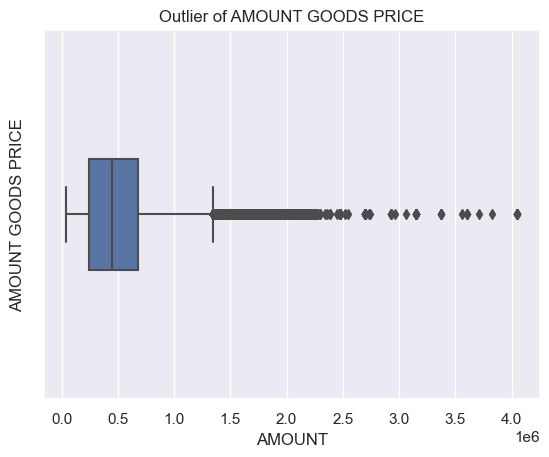

In [30]:
# Create a boxplot for AMT_INCOME_TOTAL column
sns.set()
sns.boxplot(x=application_df['AMT_GOODS_PRICE'], width=0.3)

# Set title and labels
plt.title('Outlier of AMOUNT GOODS PRICE')
plt.ylabel('AMOUNT GOODS PRICE')
plt.xlabel('AMOUNT')

# Display the plot
plt.show()

In [31]:
#Identifying data imbalance un the data
class_counts = application_df['TARGET'].value_counts()
total_count = class_counts.sum()
class_ratio = class_counts / total_count

# Print the percentage of each class
print('Target 0: {:.2%}'.format(class_ratio[0]))
print('Target 1 : {:.2%}'.format(class_ratio[1]))

Target 0: 91.93%
Target 1 : 8.07%


In [32]:
#ratio of data imbalance
imbalance_ratio = class_ratio[0] / class_ratio[1]
print('Imbalance Ratio: {:.2f}'.format(imbalance_ratio))

Imbalance Ratio: 11.39


In [33]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_H

As we can see there are imbalance in dataset so it is recommended to create two seperate dataframe for further analysis.
Target1 represent cases with payment difficulties where as Target0 define who have no difficulties with paymennts and all other cases.


In [34]:
#Creating two dataframes for Trget 0 and Target 1
df_target0 = application_df[application_df['TARGET'] == 0]
df_target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amount_Income_range,CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,"75000,100000",450000-500000


In [35]:
df_target1 = application_df[application_df['TARGET'] == 1]
df_target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amount_Income_range,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,100000-125000,900000 and above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,200000-225000,900000 and above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,125000-150000,250000-300000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"75000,100000",250000-300000


In [36]:
#df_target0 = df_target0.dropna()
df_target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amount_Income_range,CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,"75000,100000",450000-500000


In [37]:
#df_target1 = df_target1.dropna()
df_target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amount_Income_range,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,100000-125000,900000 and above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,200000-225000,900000 and above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,125000-150000,250000-300000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"75000,100000",250000-300000


Univariate analysis of Target0
Univariate analysis is a type of data analysis that focuses on examining the characteristics of 
a single variable at a time.




# Univariate analysis of Target0 and Target1 dataframe

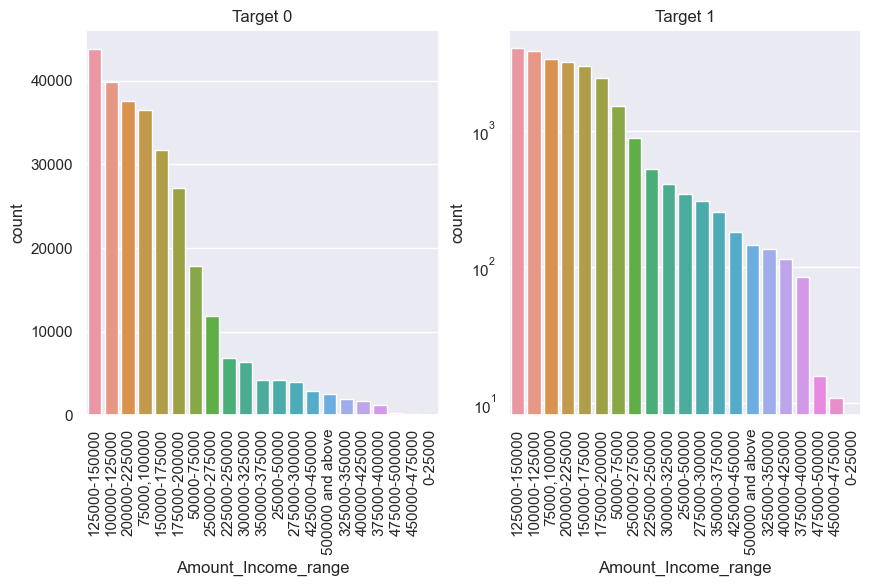

In [38]:
# What type of Income-range people mostly apply for loans.
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x='Amount_Income_range', data=df_target0, order=df_target0['Amount_Income_range'].value_counts().index, ax=ax[0])
ax[0].set_title('Target 0')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(x='Amount_Income_range', data=df_target1, order=df_target1['Amount_Income_range'].value_counts().index, ax=ax[1])
ax[1].set_title('Target 1')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.yscale('log')
plt.show()






Text(0.5, 1.0, 'Target 1')

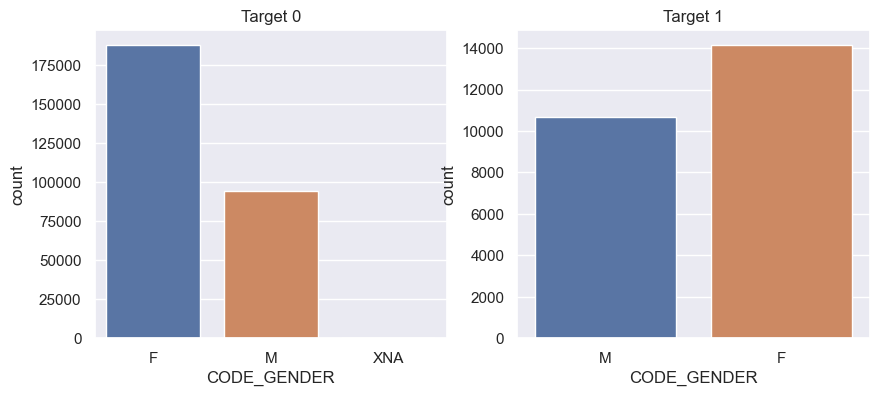

In [39]:
#Gender mostly apply for loans
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x='CODE_GENDER', data=df_target0, ax=ax[0])
sns.countplot(x='CODE_GENDER', data=df_target1, ax=ax[1])
ax[0].set_title('Target 0')
ax[1].set_title('Target 1')


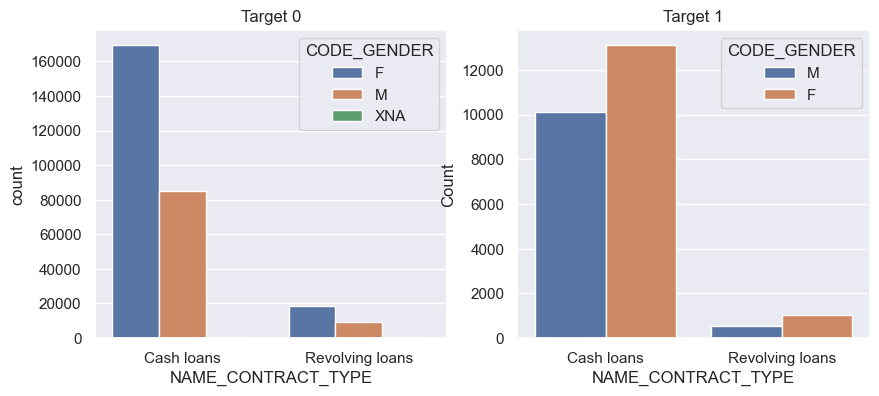

In [40]:
#NAME_CONTRACT_TYPE for loans.
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', data=df_target0, ax=ax[0])
sns.countplot(x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', data=df_target1, ax=ax[1])
ax[0].set_title('Target 0')
ax[1].set_title('Target 1')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Count')
plt.show()

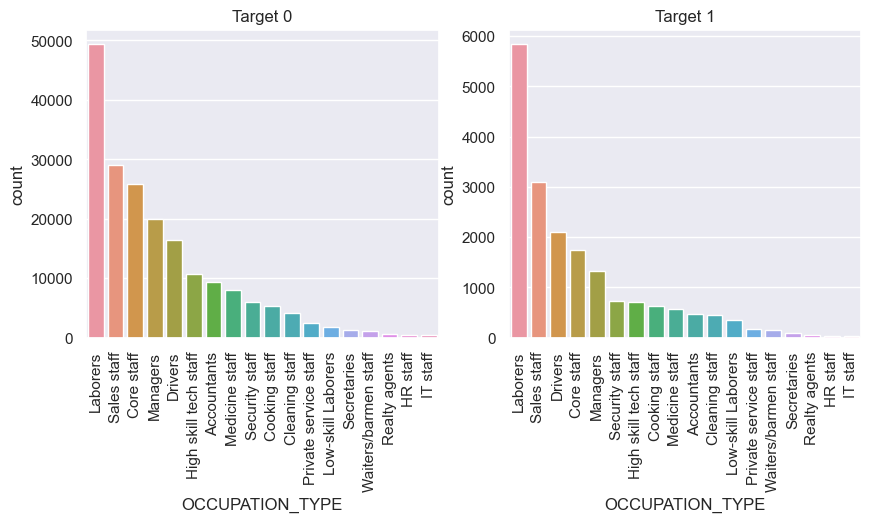

In [41]:
#Occupation of people applying for loans.
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x='OCCUPATION_TYPE', data=df_target0, order=df_target0['OCCUPATION_TYPE'].value_counts().index, ax=ax[0])
sns.countplot(x='OCCUPATION_TYPE', data=df_target1, order=df_target1['OCCUPATION_TYPE'].value_counts().index, ax=ax[1])
ax[0].set_title('Target 0')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_title('Target 1')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

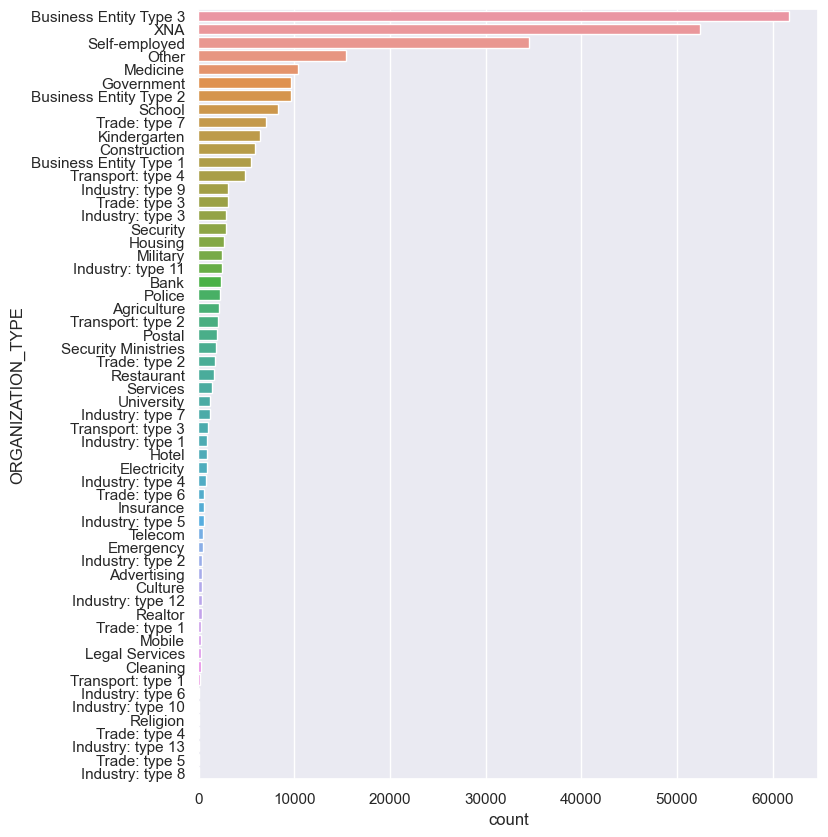

In [42]:
#What ORGANIZATION_TYPE type of peole are applying for loans.
#Target 0
plt.figure(figsize=(8,10))
sns.countplot(y='ORGANIZATION_TYPE', data=df_target0, order=df_target0['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

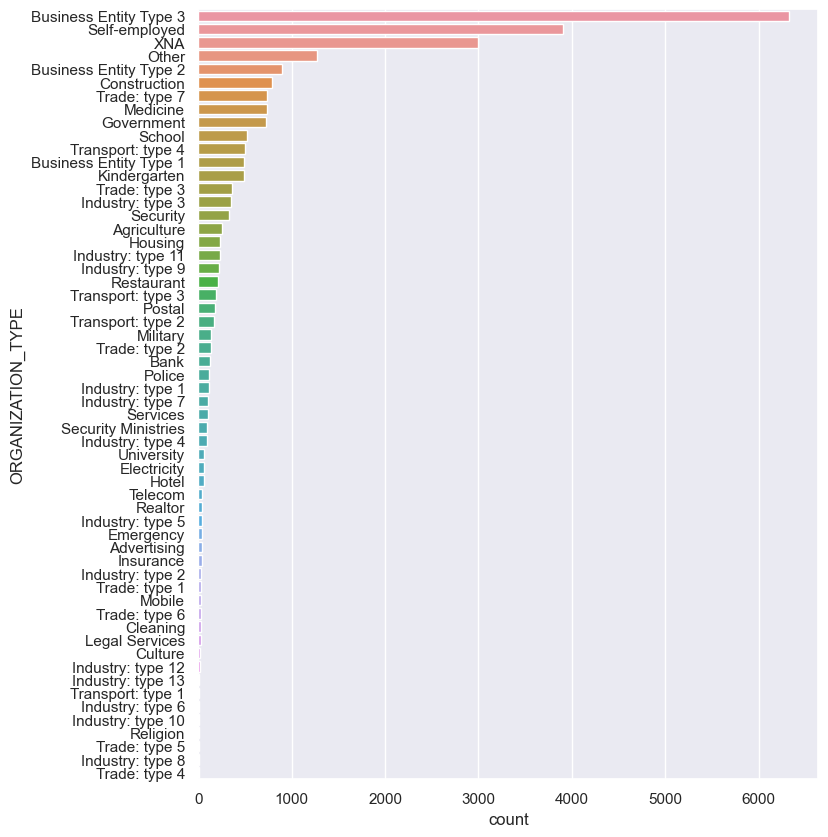

In [43]:
# Target 1
plt.figure(figsize=(8,10))
sns.countplot(y='ORGANIZATION_TYPE', data=df_target1, order=df_target1['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

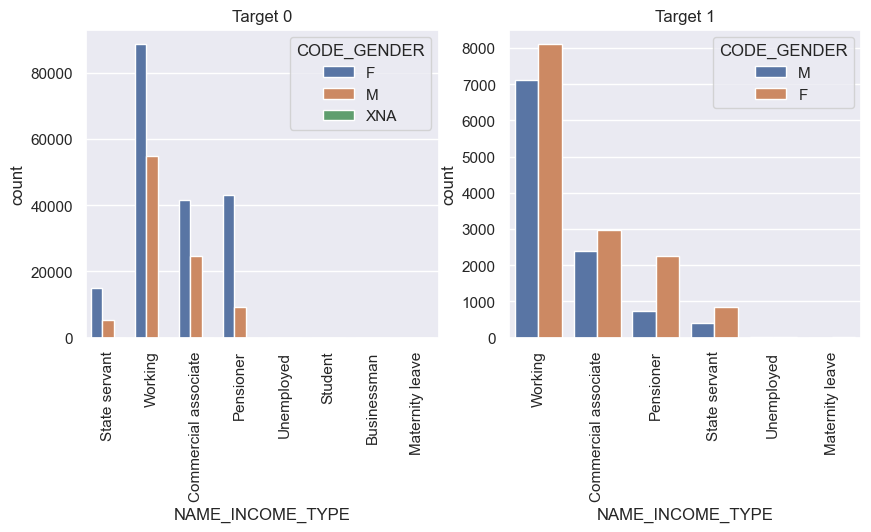

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=df_target0, ax=ax[0])
sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=df_target1, ax=ax[1])
ax[0].set_title('Target 0')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_title('Target 1')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()


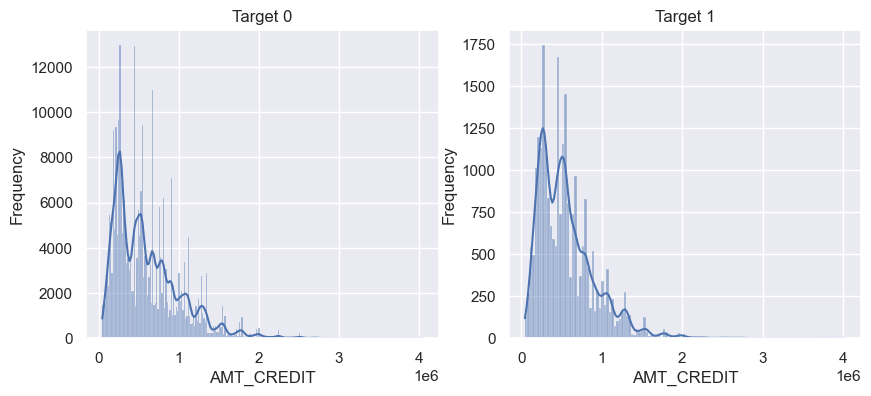

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df_target0['AMT_CREDIT'], kde=True, ax=ax[0])
sns.histplot(df_target1['AMT_CREDIT'], kde=True, ax=ax[1])
ax[0].set_title('Target 0')
ax[1].set_title('Target 1')
plt.xlabel('AMT_CREDIT')
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
plt.show()

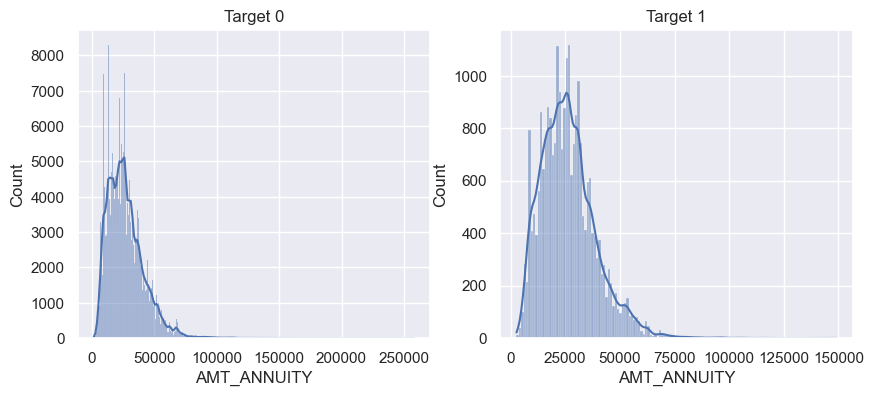

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df_target0['AMT_ANNUITY'], kde=True, ax=ax[0])
sns.histplot(df_target1['AMT_ANNUITY'], kde=True, ax=ax[1])
ax[0].set_title('Target 0')
ax[1].set_title('Target 1')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Count')
plt.show()

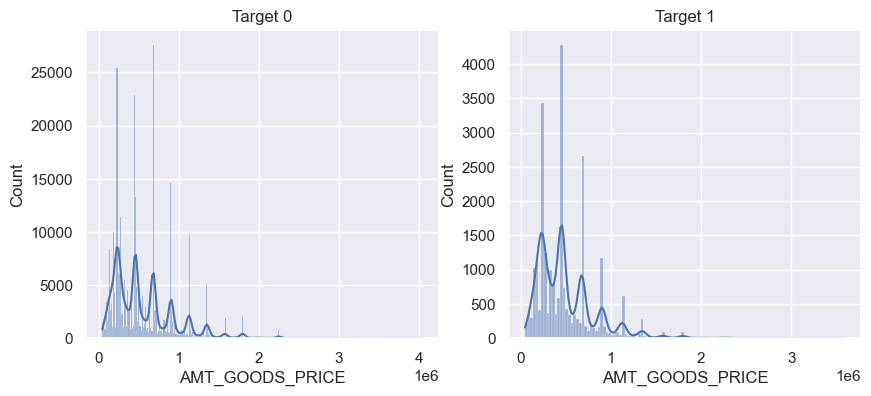

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df_target0['AMT_GOODS_PRICE'], kde=True, ax=ax[0])
sns.histplot(df_target1['AMT_GOODS_PRICE'], kde=True, ax=ax[1])
ax[0].set_title('Target 0')
ax[1].set_title('Target 1')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('Count')
plt.show()

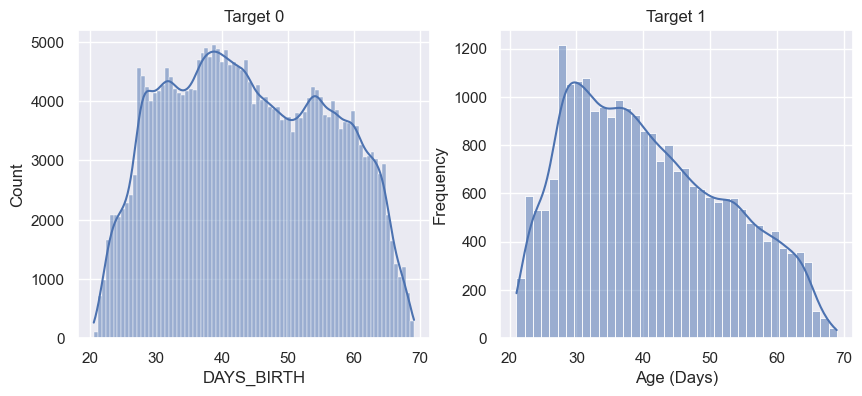

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data=df_target0, x='DAYS_BIRTH', kde=True, ax=ax[0])
sns.histplot(data=df_target1, x='DAYS_BIRTH', kde=True, ax=ax[1])
ax[0].set_title('Target 0')
ax[1].set_title('Target 1')
plt.xlabel('Age (Days)')
plt.ylabel('Frequency')
plt.show()

#Segmented univariate analysis is a statistical method that involves analyzing a single variable for different subgroups within a dataset

# Segmented Univariate analysis of Target0 and Target1 dataframe

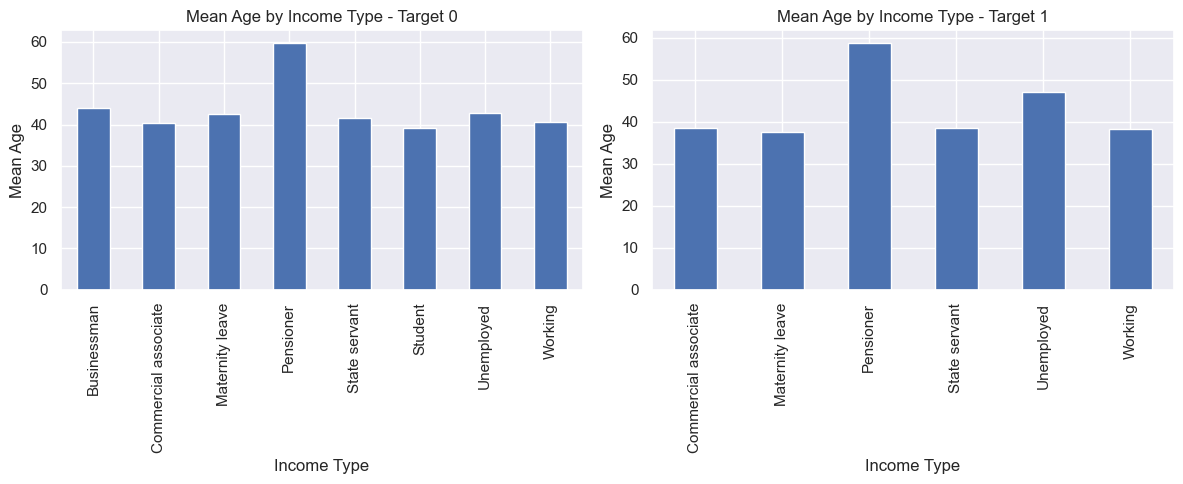

In [49]:
income_age_target0 = df_target0.groupby('NAME_INCOME_TYPE')['DAYS_BIRTH'].mean()
income_age_target1 = df_target1.groupby('NAME_INCOME_TYPE')['DAYS_BIRTH'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

income_age_target0.plot(kind='bar', xlabel='Income Type', ylabel='Mean Age', title='Mean Age by Income Type - Target 0', ax=ax[0])
income_age_target1.plot(kind='bar', xlabel='Income Type', ylabel='Mean Age', title='Mean Age by Income Type - Target 1', ax=ax[1])

plt.tight_layout()
plt.show()

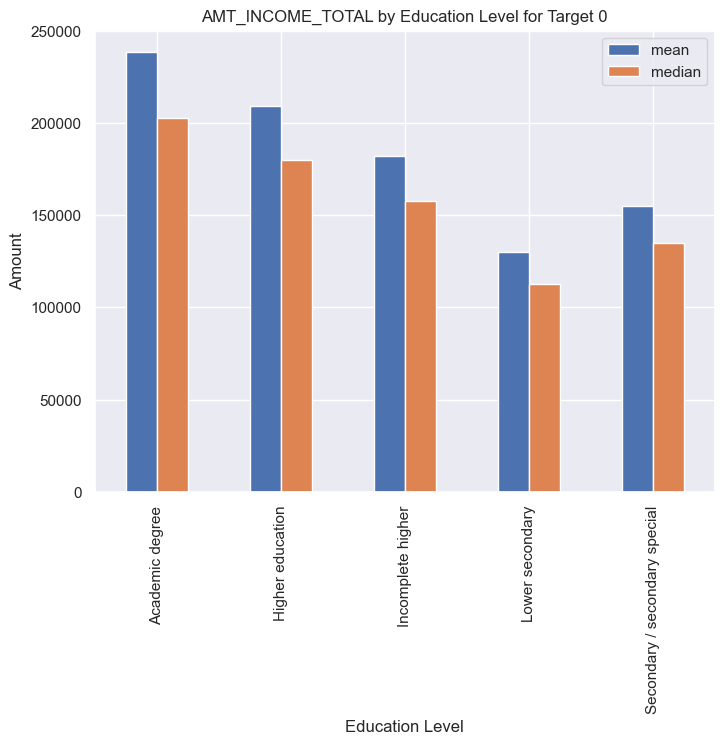

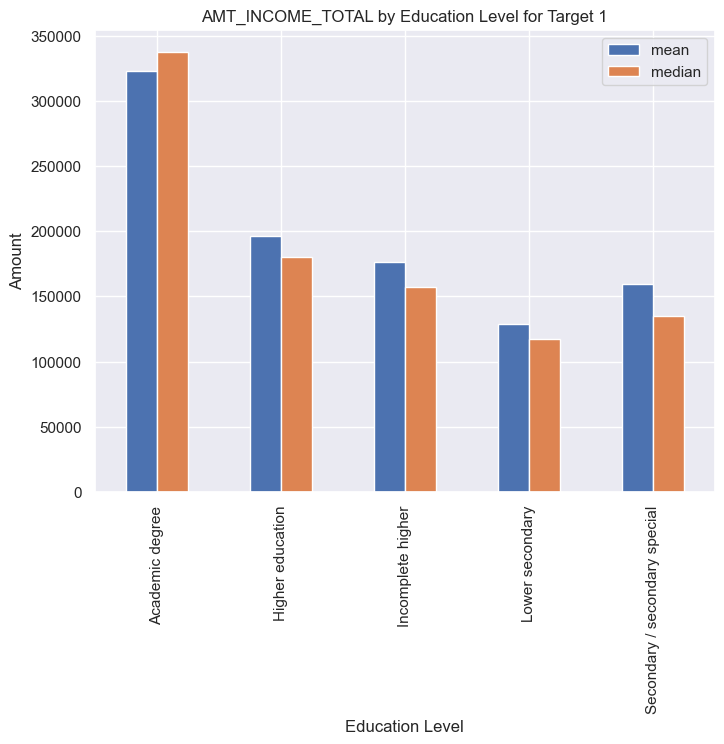

In [50]:
education_groups0 = df_target0.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].agg(['mean', 'median'])
education_groups1 = df_target1.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].agg(['mean', 'median'])

# Plotting the mean and median values for each education group for Taregt 0
education_groups0.plot(kind='bar', figsize=(8,6))
plt.title('AMT_INCOME_TOTAL by Education Level for Target 0')
plt.xlabel('Education Level')
plt.ylabel('Amount')
plt.show()

#Plot the mean and median values for each education group for target 1
education_groups1.plot(kind='bar', figsize=(8,6))
plt.title('AMT_INCOME_TOTAL by Education Level for Target 1')
plt.xlabel('Education Level')
plt.ylabel('Amount')
plt.show()

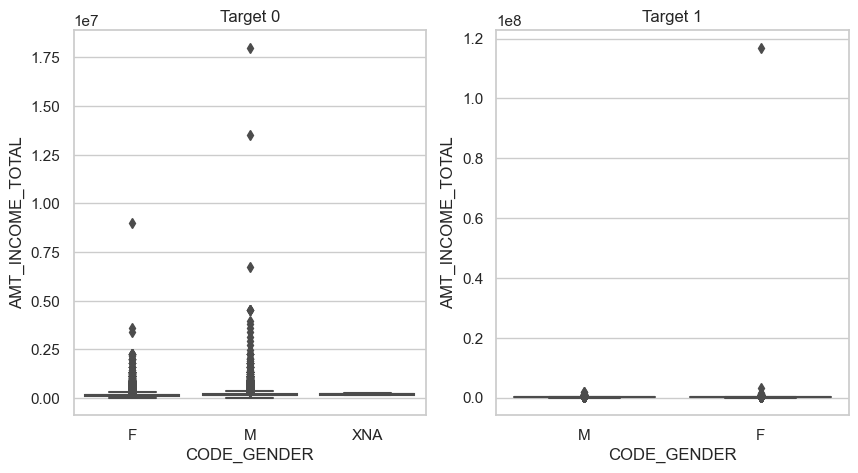

In [51]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x="CODE_GENDER", y="AMT_INCOME_TOTAL", data=df_target0, ax=ax[0])
sns.boxplot(x="CODE_GENDER", y="AMT_INCOME_TOTAL", data=df_target1, ax=ax[1])
ax[0].set_title('Target 0')
ax[1].set_title('Target 1')
plt.show()


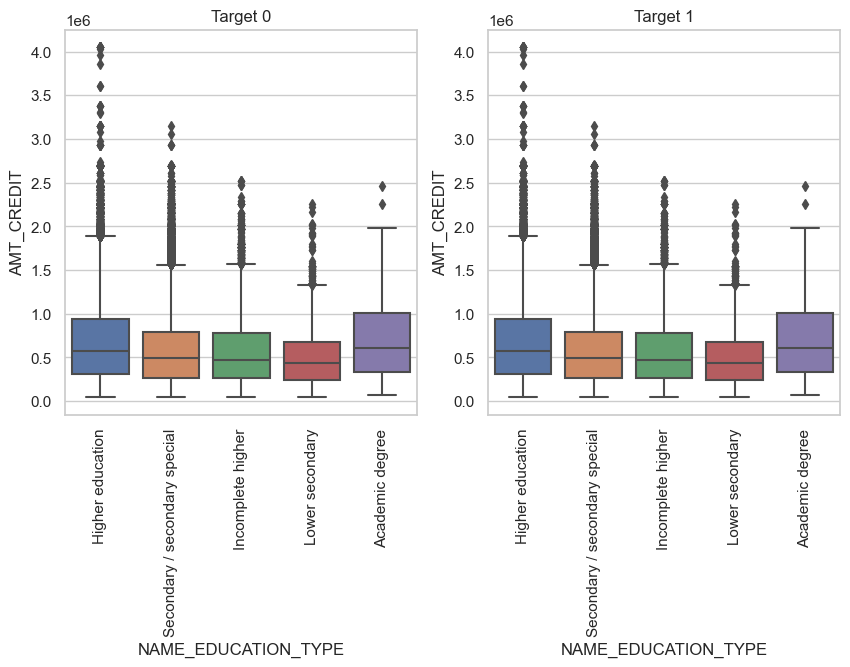

In [52]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", data=df_target0, ax=ax[0])
sns.boxplot(x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", data=df_target0, ax=ax[1])
ax[0].set_title('Target 0')
ax[1].set_title('Target 1')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

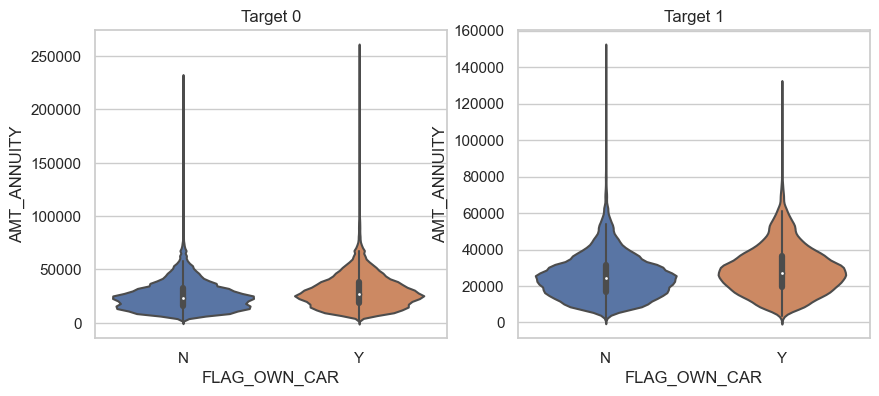

In [53]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.violinplot(x="FLAG_OWN_CAR", y="AMT_ANNUITY", data=df_target0, ax=ax[0])
sns.violinplot(x="FLAG_OWN_CAR", y="AMT_ANNUITY", data=df_target1, ax=ax[1])
ax[0].set_title('Target 0')
ax[1].set_title('Target 1')
plt.show()

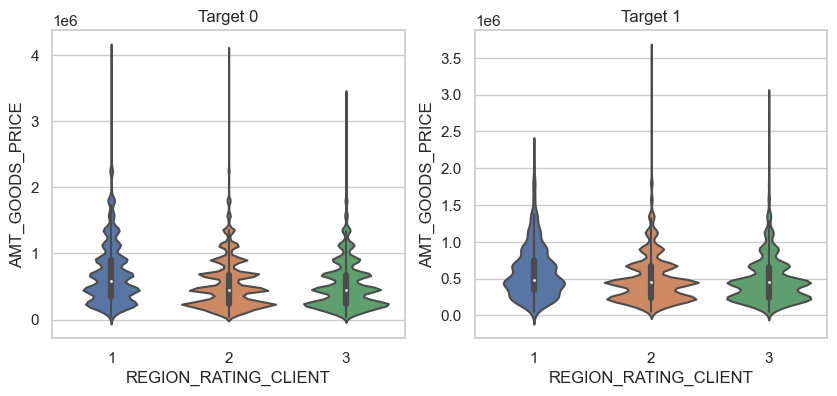

In [54]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.violinplot(x="REGION_RATING_CLIENT", y="AMT_GOODS_PRICE", data=df_target0, ax=ax[0])
sns.violinplot(x="REGION_RATING_CLIENT", y="AMT_GOODS_PRICE", data=df_target1, ax=ax[1])
ax[0].set_title('Target 0')
ax[1].set_title('Target 1')
plt.show()

#    Bivariate Analysis of dataframe "Target0 and Target1"

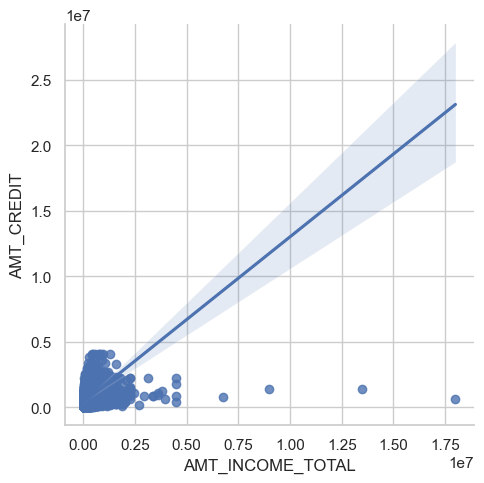

In [55]:
sns.set_style("whitegrid")
sns.lmplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", data=df_target0)
plt.show()


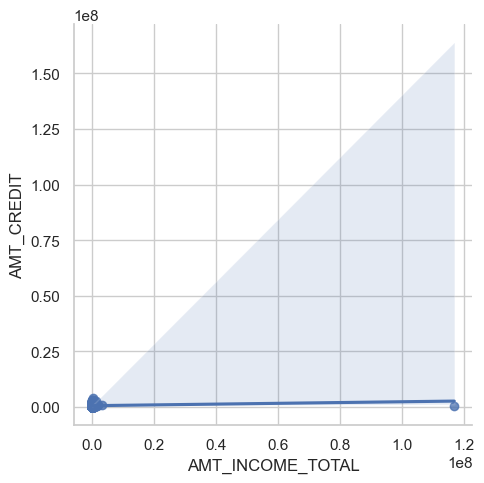

In [187]:
sns.set_style("whitegrid")
sns.lmplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", data=df_target1)
plt.show()


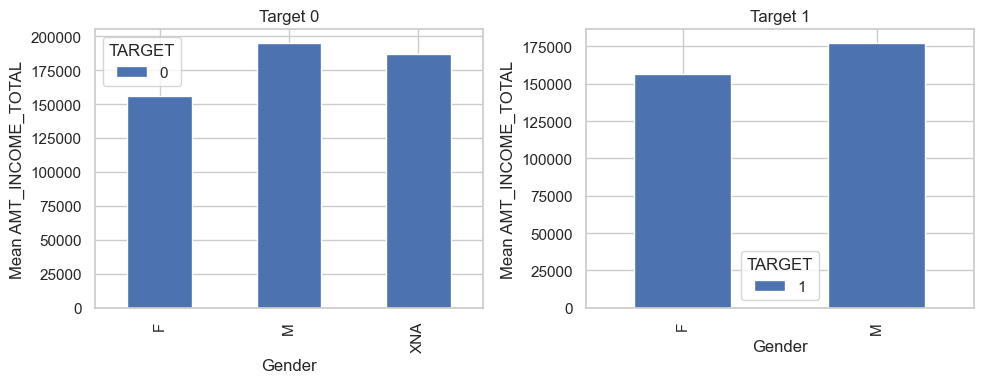

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# For Target 0
df_target0.groupby(['CODE_GENDER', 'TARGET'])['AMT_INCOME_TOTAL'].mean().unstack().plot(kind='bar', ax=ax[0])
ax[0].set_title('Target 0')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Mean AMT_INCOME_TOTAL')

# For Target 1
df_target1.groupby(['CODE_GENDER', 'TARGET'])['AMT_INCOME_TOTAL'].mean().unstack().plot(kind='bar', ax=ax[1])
ax[1].set_title('Target 1')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Mean AMT_INCOME_TOTAL')

plt.tight_layout()
plt.show()


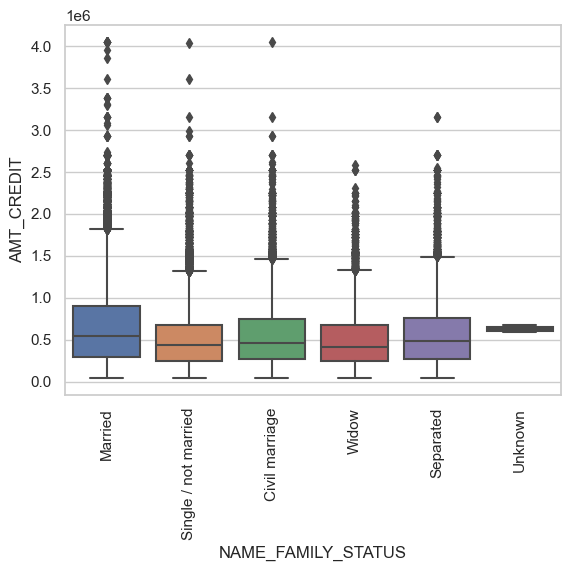

In [57]:
sns.boxplot(x="NAME_FAMILY_STATUS", y="AMT_CREDIT", data=df_target0)
plt.xticks(rotation=90)
plt.show()


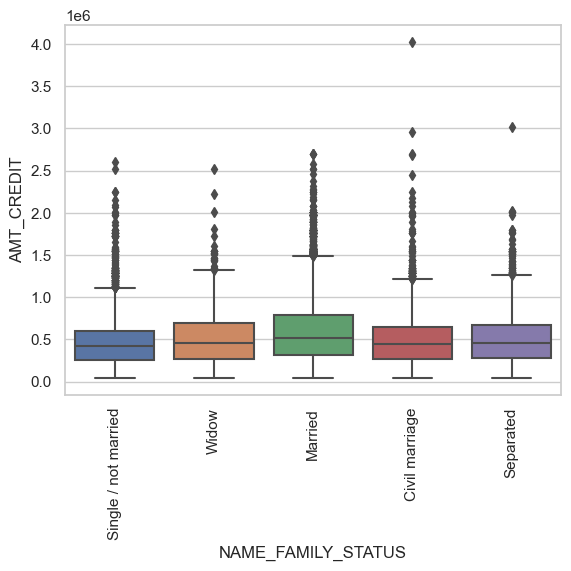

In [188]:
sns.boxplot(x="NAME_FAMILY_STATUS", y="AMT_CREDIT", data=df_target1)
plt.xticks(rotation=90)
plt.show()


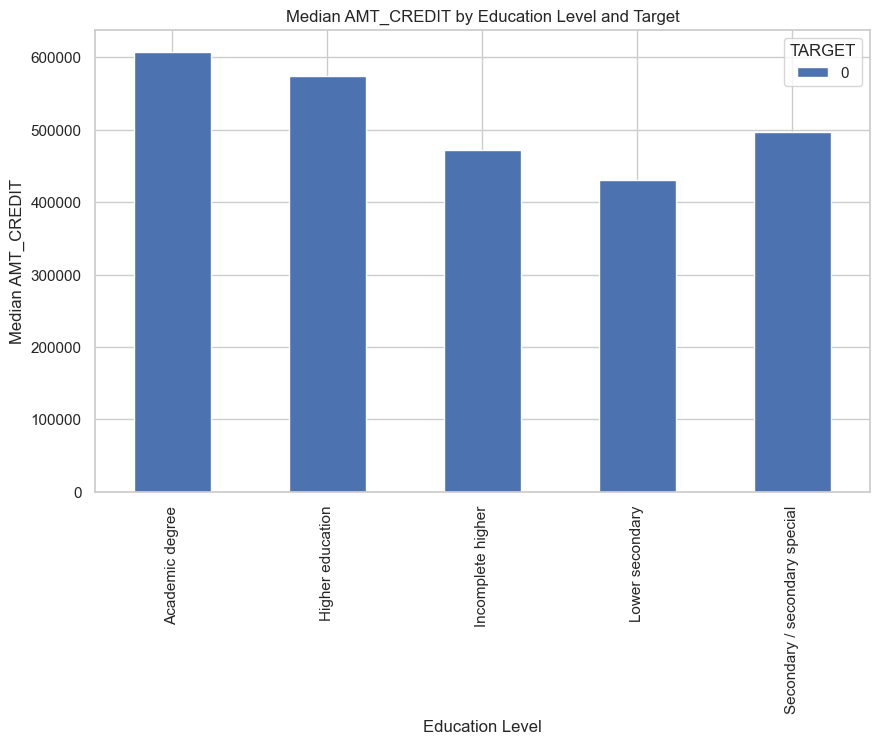

In [58]:
# Group the data by "NAME_EDUCATION_TYPE" and "TARGET" columns, and calculate the median value of "AMT_CREDIT" for each group
education_credit = df_target0.groupby(['NAME_EDUCATION_TYPE', 'TARGET'])['AMT_CREDIT'].median().unstack()

# Plot the median value of "AMT_CREDIT" for each group
education_credit.plot(kind='bar', figsize=(10,6))
plt.title('Median AMT_CREDIT by Education Level and Target')
plt.xlabel('Education Level')
plt.ylabel('Median AMT_CREDIT')
plt.show()


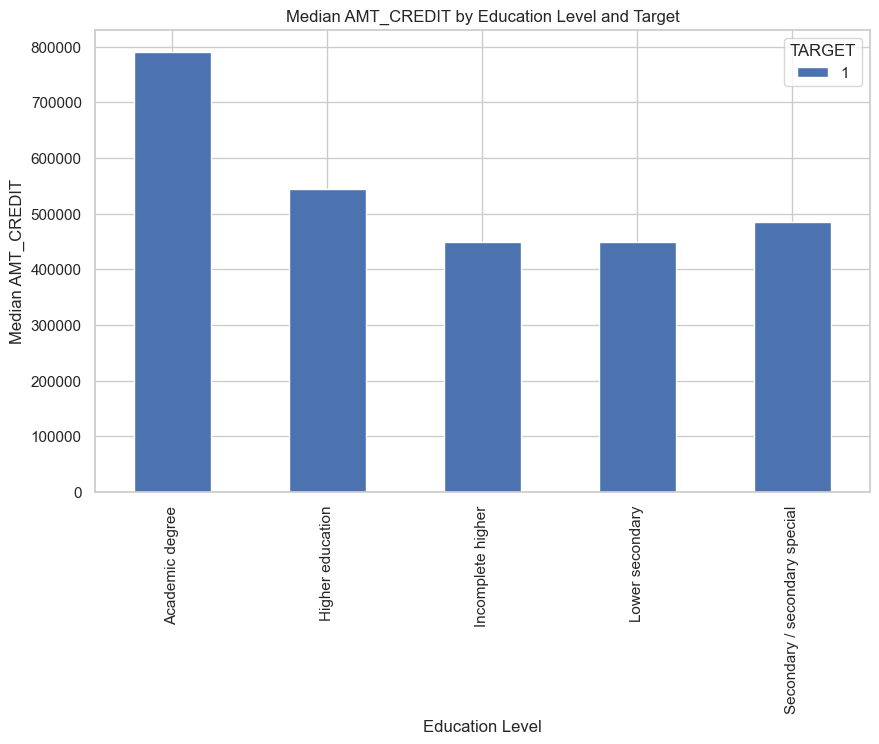

In [59]:
# Group the data by "NAME_EDUCATION_TYPE" and "TARGET" columns, and calculate the median value of "AMT_CREDIT" for each group
education_credit = df_target1.groupby(['NAME_EDUCATION_TYPE', 'TARGET'])['AMT_CREDIT'].median().unstack()

# Plot the median value of "AMT_CREDIT" for each group
education_credit.plot(kind='bar', figsize=(10,6))
plt.title('Median AMT_CREDIT by Education Level and Target')
plt.xlabel('Education Level')
plt.ylabel('Median AMT_CREDIT')
plt.show()


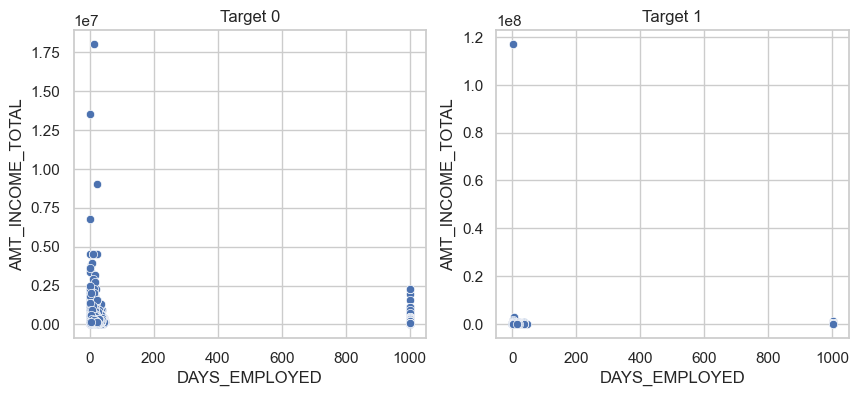

In [60]:
#"DAYS_EMPLOYED" and "AMT_INCOME_TOTAL" can help us understand if there is a relationship between how long someone
#has been employed and their income.
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(x='DAYS_EMPLOYED', y='AMT_INCOME_TOTAL', data=df_target0, ax=ax[0])
ax[0].set_title('Target 0')
sns.scatterplot(x='DAYS_EMPLOYED', y='AMT_INCOME_TOTAL', data=df_target1, ax=ax[1])
ax[1].set_title('Target 1')
plt.show()


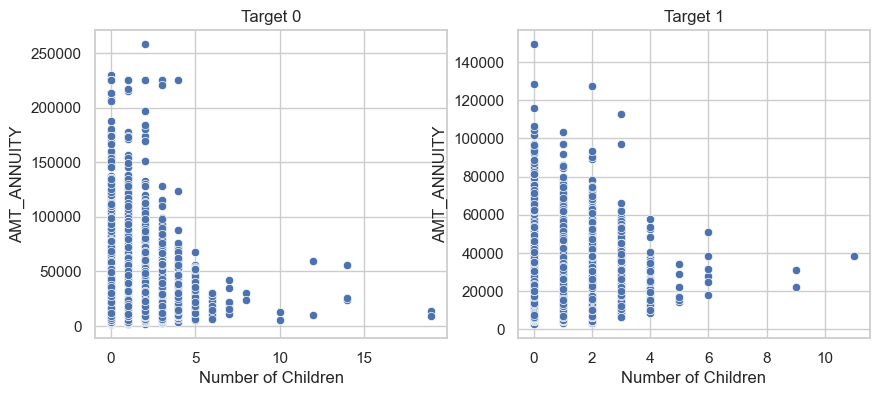

In [61]:
#"CNT_CHILDREN" and "AMT_ANNUITY" can help us understand if there is a relationship between 
#the number of children someone has and the amount of their annuity payments.
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x="CNT_CHILDREN", y="AMT_ANNUITY", data=df_target0, ax=ax[0])
ax[0].set_title("Target 0")
ax[0].set_xlabel("Number of Children")
ax[0].set_ylabel("AMT_ANNUITY")

sns.scatterplot(x="CNT_CHILDREN", y="AMT_ANNUITY", data=df_target1, ax=ax[1])
ax[1].set_title("Target 1")
ax[1].set_xlabel("Number of Children")
ax[1].set_ylabel("AMT_ANNUITY")

plt.show()
    

# Top 10 Correlation

Top 10 correlation for the Client with payment difficulties and all other cases .

In [102]:
# Find the correlations for each target group
corr_target0 = df_target0.corr()

# Sort the correlation matrices by absolute value
corr_target0 = corr_target0.unstack().sort_values(ascending=False).drop_duplicates()

# Get the top 10 correlations for Target = 0
top_corr_target0 = corr_target0[1:11]

# Create a DataFrame to display the top 10 correlations
top_corr_target0_df = pd.DataFrame(top_corr_target0, columns=['Correlation'])
top_corr_target0_df.index.names = ['Variable 1', 'Variable 2']
top_corr_target0_df.reset_index(inplace=True)

# Display the top 10 correlations for Target = 0 in a table
print('Top 10 Correlations for Target = 0:')
print(top_corr_target0_df.to_string(index=False))


Top 10 Correlations for Target = 0:
                 Variable 1                  Variable 2  Correlation
   OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998508
            AMT_GOODS_PRICE                  AMT_CREDIT     0.987250
       REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY     0.950149
               CNT_CHILDREN             CNT_FAM_MEMBERS     0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
   DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.859332
    LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381
            AMT_GOODS_PRICE                 AMT_ANNUITY     0.776686
                AMT_ANNUITY                  AMT_CREDIT     0.771309
                 DAYS_BIRTH               DAYS_EMPLOYED     0.626114


In [104]:
# Find the correlations for each target group
corr_target1 = df_target1.corr()

# Sort the correlation matrices by absolute value
corr_target1 = corr_target1.unstack().sort_values(ascending=False).drop_duplicates()

# Get the top 10 correlations for Target = 0
top_corr_target1 = corr_target1[1:11]

# Create a DataFrame to display the top 10 correlations
top_corr_target1_df = pd.DataFrame(top_corr_target1, columns=['Correlation'])
top_corr_target1_df.index.names = ['Variable 1', 'Variable 2']
top_corr_target1_df.reset_index(inplace=True)

# Display the top 10 correlations for Target = 0 in a table
print('Top 10 Correlations for Target = 1:')
print(top_corr_target1_df.to_string(index=False))

Top 10 Correlations for Target = 1:
                Variable 1                  Variable 2  Correlation
  OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998269
                AMT_CREDIT             AMT_GOODS_PRICE     0.983103
      REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY     0.956637
           CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484
  DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE     0.868994
REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION     0.847885
   LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540
           AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699
               AMT_ANNUITY                  AMT_CREDIT     0.752195
             DAYS_EMPLOYED                  DAYS_BIRTH     0.582185


# Reading Previous application data

In [127]:
previous_application = 'C:/Users/ASHUTOSH/Downloads/Loan/previous_application.csv'
previous_df = pd.read_csv(previous_application)
previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
previous_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [129]:
#Describing the dataframes
previous_df.describe()


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [130]:
#Finding null values column-wise
previous_df.isnull().sum().sort_values()

SK_ID_PREV                           0
NAME_YIELD_GROUP                     0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
NAME_PORTFOLIO                       0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON                   0
DAYS_DECISION                        0
NAME_CONTRACT_STATUS                 0
NAME_CASH_LOAN_PURPOSE               0
NAME_PAYMENT_TYPE                    0
AMT_APPLICATION                      0
NFLAG_LAST_APPL_IN_DAY               0
FLAG_LAST_APPL_PER_CONTRACT          0
HOUR_APPR_PROCESS_START              0
WEEKDAY_APPR_PROCESS_START           0
NAME_CONTRACT_TYPE                   0
SK_ID_CURR                           0
AMT_CREDIT                           1
PRODUCT_COMBINATION                346
CNT_PAYMENT                     372230
AMT_ANNUITY                     372235
AMT_GOODS_PRICE          

In [131]:
#Column wise null percentage
previous_df.isnull().sum().sort_values(ascending=False)/len(previous_df)*100

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [132]:
previous_df.isnull().sum(axis=1) / len(previous_df)

0          5.987257e-07
1          2.394903e-06
2          2.394903e-06
3          2.993628e-06
4          6.585982e-06
               ...     
1670209    1.796177e-06
1670210    1.197451e-06
1670211    1.197451e-06
1670212    2.394903e-06
1670213    2.394903e-06
Length: 1670214, dtype: float64

In [133]:
# Calculate the null percentage for each column
null_percentage = previous_df.isnull().sum() / len(previous_df)
# Get the list of columns with null percentage greater than 40%
columns_to_drop = null_percentage[null_percentage > 0.42].index.tolist()
# Drop the columns from the dataframe
previous_df = previous_df.drop(columns_to_drop, axis=1)


Merging Application Data with Previous application Dataon the basis of Foreign KeySK_ID_CURR.



In [151]:
merged_df = application_df.merge(previous_df, on='SK_ID_CURR', how='left')
merged_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Consumer electronics,12.0,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
9,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,18.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'Amount_Income_range', 'CREDIT_RANGE', 'SK_ID_PREV',
   

In [154]:
columns_to_drop =['NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START_x',
                   'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                   'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','DAYS_FIRST_DRAWING']
len(columns_to_drop)

11

In [155]:
merged_df.drop(columns_to_drop,inplace=True,axis=1)
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 68 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1430155 non-null  int64   
 1   TARGET                        1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1430155 non-null  object  
 3   CODE_GENDER                   1430155 non-null  object  
 4   FLAG_OWN_CAR                  1430155 non-null  object  
 5   FLAG_OWN_REALTY               1430155 non-null  object  
 6   CNT_CHILDREN                  1430155 non-null  int64   
 7   AMT_INCOME_TOTAL              1430155 non-null  float64 
 8   AMT_CREDIT_x                  1430155 non-null  float64 
 9   AMT_ANNUITY_x                 1430062 non-null  float64 
 10  AMT_GOODS_PRICE_x             1428936 non-null  float64 
 11  NAME_INCOME_TYPE              1430155 non-null  object  
 12  NAME_EDUCATION

Univariate Analysis on Merged Dataframes

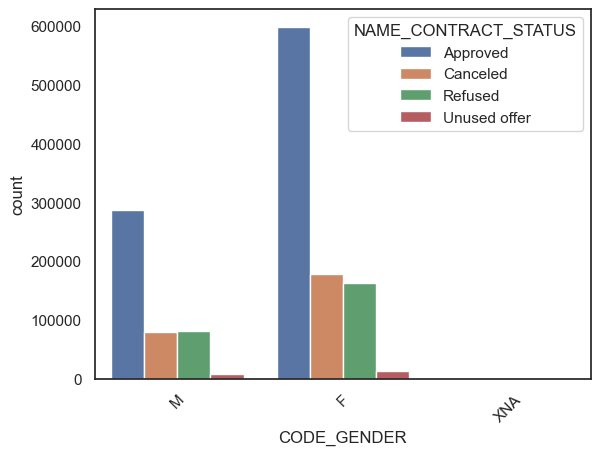

In [163]:
# Creating a barplot of NAME_CONTRACT_STATUS by CODE_GENDER
sns.countplot(x="CODE_GENDER", hue="NAME_CONTRACT_STATUS", data=merged_df)
plt.xticks(rotation=45)

# Show the plot
plt.show()


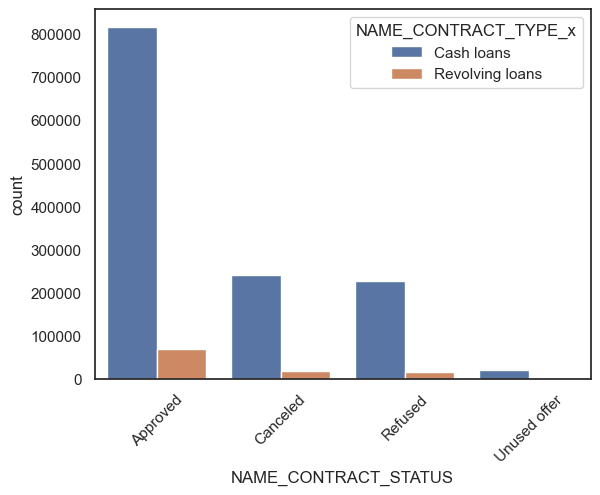

In [165]:
# Creating a barplot of NAME_CONTRACT_STATUS by NAME_CONTRACT_TYPE_x
sns.countplot(x="NAME_CONTRACT_STATUS", hue="NAME_CONTRACT_TYPE_x", data=merged_df)
plt.xticks(rotation=45)

# Show the plot
plt.show()


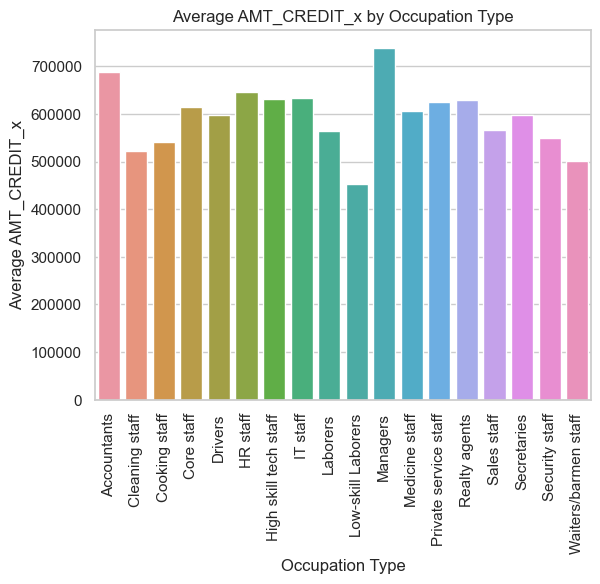

In [189]:
# Group the data by OCCUPATION_TYPE and calculate the average AMT_CREDIT_x
occ_mean_credit = merged_df.groupby('OCCUPATION_TYPE')['AMT_CREDIT_x'].mean().reset_index()

# Create the barplot
sns.barplot(x='OCCUPATION_TYPE', y='AMT_CREDIT_x', data=occ_mean_credit)
plt.xticks(rotation=90)
plt.xlabel('Occupation Type')
plt.ylabel('Average AMT_CREDIT_x')
plt.title('Average AMT_CREDIT_x by Occupation Type')
plt.show()


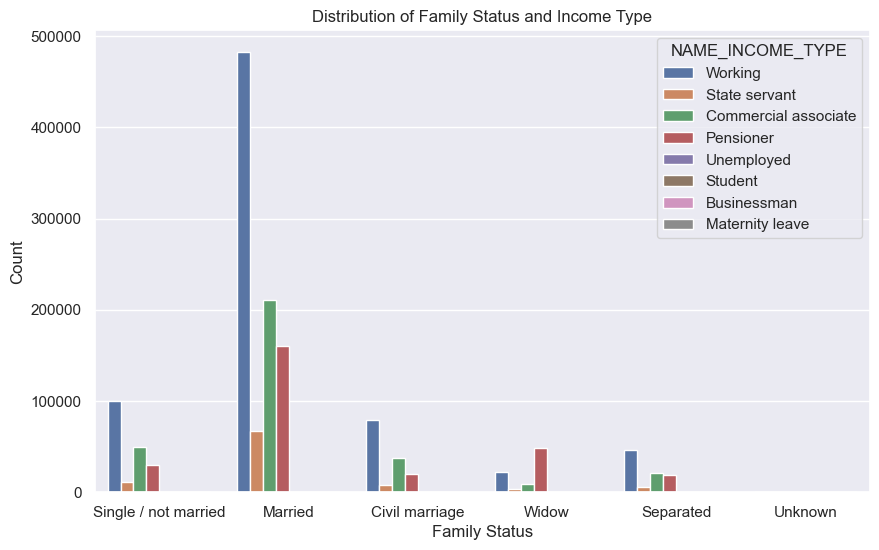

In [190]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=merged_df, x='NAME_FAMILY_STATUS', hue='NAME_INCOME_TYPE', ax=ax)
ax.set_xlabel('Family Status')
ax.set_ylabel('Count')
ax.set_title('Distribution of Family Status and Income Type')
plt.show()

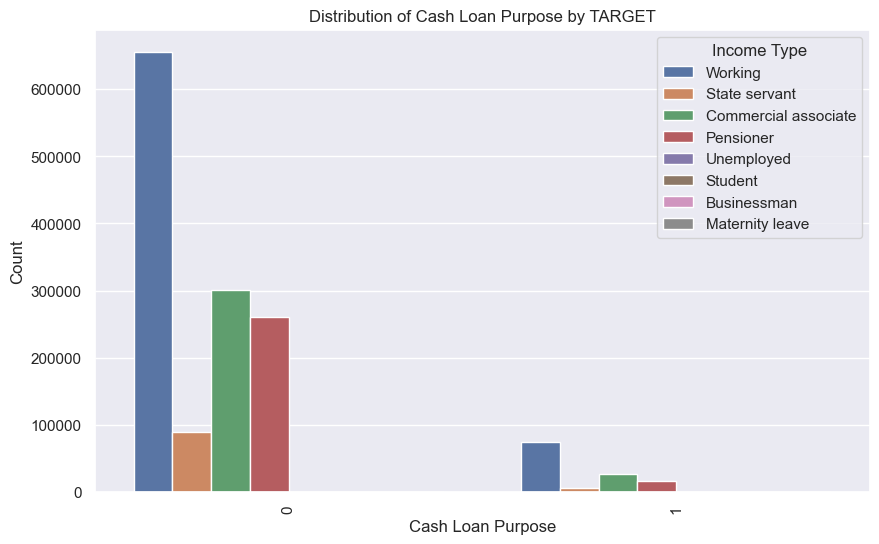

In [195]:
plt.figure(figsize=(10,6))
sns.countplot(x='TARGET', hue='NAME_INCOME_TYPE', data=merged_df)
plt.xticks(rotation=90)
plt.title('Distribution of Cash Loan Purpose by TARGET')
plt.xlabel('Cash Loan Purpose')
plt.ylabel('Count')
plt.legend(title='Income Type')
plt.show()


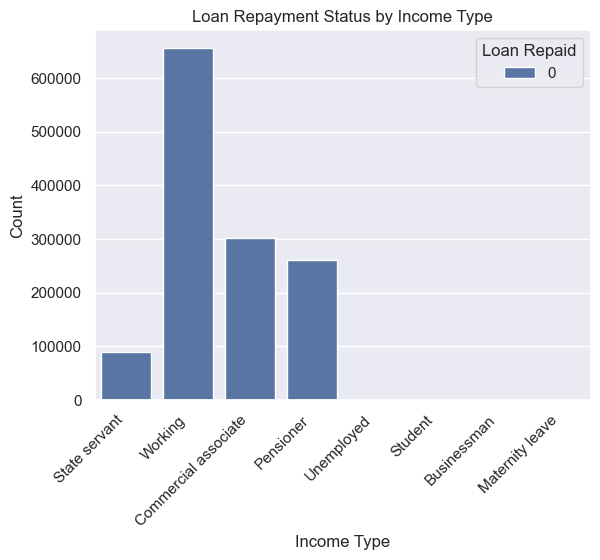

In [198]:
# Filter the data for borrowers who have returned their loan on time
df_paid = merged_df[merged_df['TARGET']==0]

# Create a stacked bar chart of income type vs. loan repayment status
sns.countplot(data=df_paid, x='NAME_INCOME_TYPE', hue='TARGET')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Loan Repayment Status by Income Type')
plt.legend(title='Loan Repaid', loc='upper right')
plt.show()


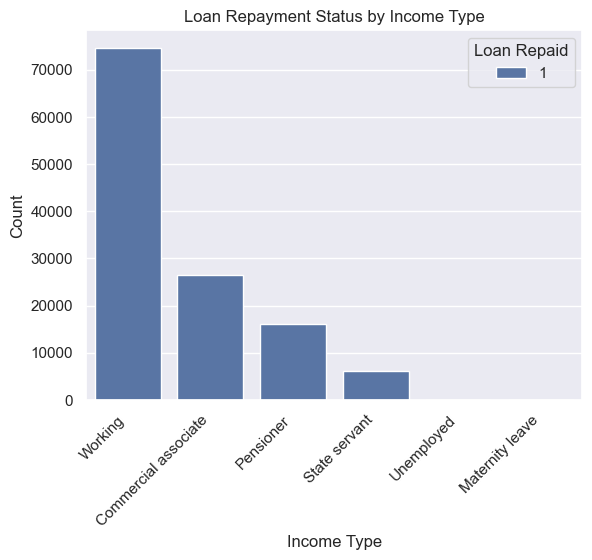

In [199]:
# Filter the data for borrowers who have returned their loan on time
df_paid = merged_df[merged_df['TARGET']==1]

# Create a stacked bar chart of income type vs. loan repayment status
sns.countplot(data=df_paid, x='NAME_INCOME_TYPE', hue='TARGET')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Loan Repayment Status by Income Type')
plt.legend(title='Loan Repaid', loc='upper right')
plt.show()


Bivariate Analysis on Merged Dataframes

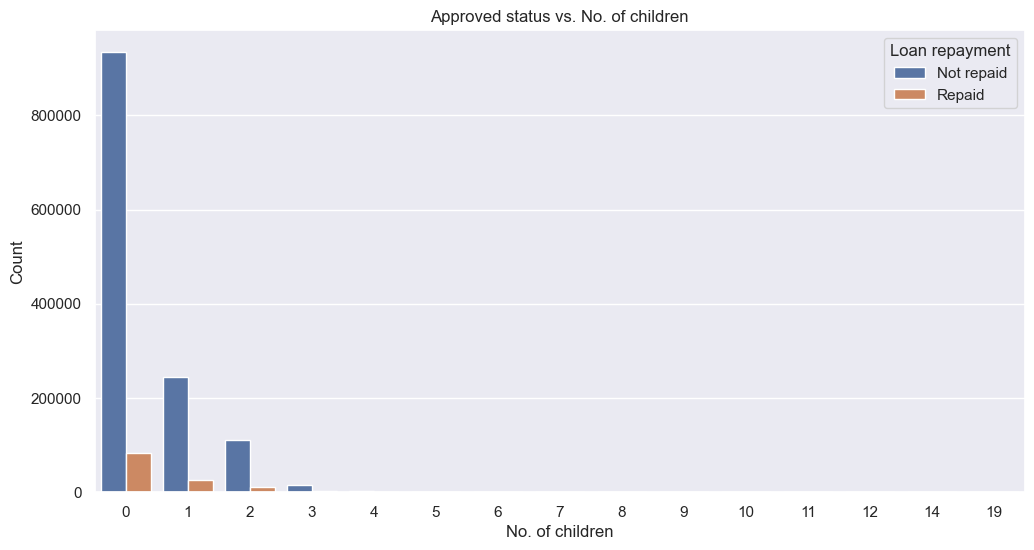

In [202]:
#CNT_CHILDREN
plt.figure(figsize=(12, 6))
sns.countplot(x="CNT_CHILDREN", hue="TARGET", data=merged_df)
plt.title("Approved status vs. No. of children")
plt.xlabel("No. of children")
plt.ylabel("Count")
plt.legend(title="Loan repayment", labels=["Not repaid", "Repaid"])
plt.show()



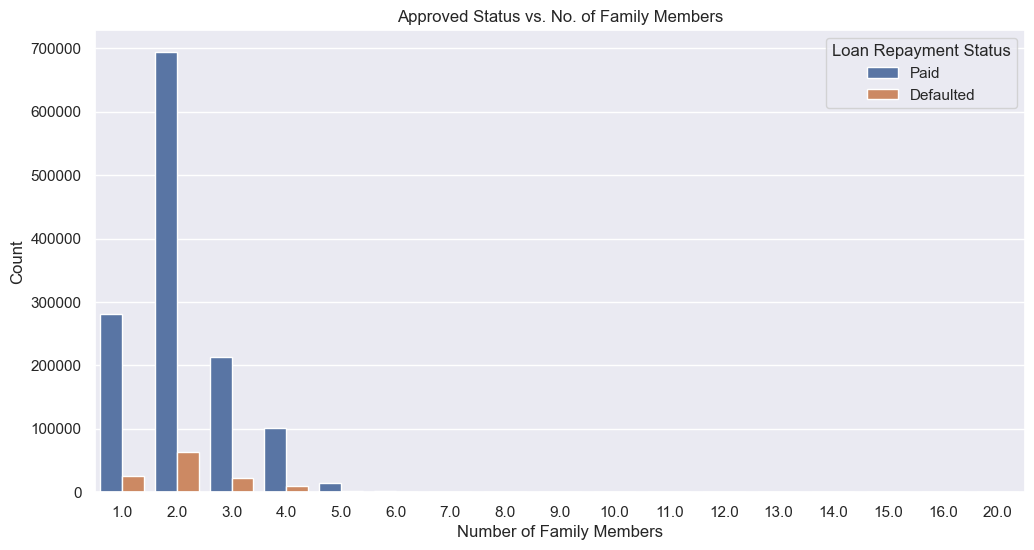

In [203]:
# Plotting approved status vs. number of family members
plt.figure(figsize=(12, 6))
sns.countplot(x="CNT_FAM_MEMBERS", hue="TARGET", data=merged_df)
plt.title("Approved Status vs. No. of Family Members")
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.legend(title="Loan Repayment Status", labels=["Paid", "Defaulted"])
plt.show()

In [168]:
status_counts = merged_df['NAME_CONTRACT_STATUS'].value_counts()

# Filter the resulting Series to only include the four values you are interested in
filtered_counts = status_counts[status_counts.index.isin(['Approved', 'Canceled', 'Refused', 'Unused offer'])]

# Print the filtered counts
print(filtered_counts)

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64
